# Импорт библиотек

In [15]:
from hashlib import new
from statistics import mean
import pandas as pd
import re
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns
import numpy as np
churn_data = pd.read_csv('churn.csv', sep=',')
churn_data.drop('RowNumber', axis='columns', inplace=True)

# Задание 9.1
## Соотношение ушедших и лояльных клиентов

Лояльный клиент    7963
Ушедший клиент     2037
Name: Loyalty, dtype: int64


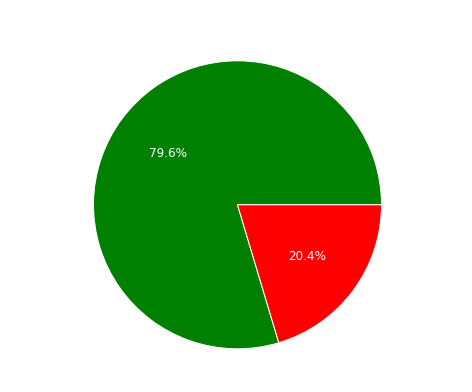

In [16]:
def loyal(exited):
    if exited == 1:
        return 'Ушедший клиент'
    else:
        return 'Лояльный клиент'
    
churn_data['Loyalty'] = churn_data['Exited'].apply(loyal)


churn_data_ex= churn_data['Loyalty'].value_counts()
print(churn_data_ex.head())
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data_ex,
    labels=churn_data_ex.index,
    colors = ( "green", "red"),
    textprops={'color':"w"},
    autopct='%.1f%%',
);
axes.set_title('Соотношение лояльных клиентов к ушедшим', fontsize=16, color='w')

plt.rcParams['font.size'] = 15



На полученной груговой диаграмме отображается процент ушедших и лояльных клиентов. Можно сделать вывод, что примерно каждый пятный клиент уходит из банка.
Диаграмма построена с помощью библиотеки Matplotlib

# Задание 9.2
## Распределение баланса пользователей, у которых на счету больше 2 500 долларов

Text(0, 0.5, 'Количество пользователей')

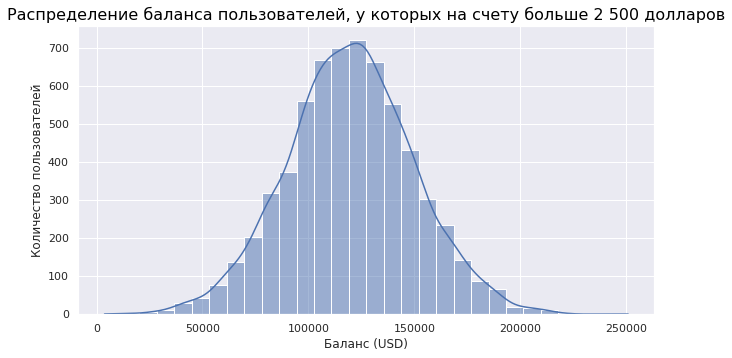

In [17]:
churn_data_92 = churn_data[churn_data['Balance'] > 2500]
fig92 = plt.figure(figsize=(4, 4))
axes = fig92.add_axes([0, 0, 2, 1])
sns.histplot(
    churn_data_92,
    x='Balance',
    bins = 30,
    kde = True,
    ax = axes
    )
axes.set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов', fontsize=16, color='black')
axes.set_xlabel('Баланс (USD)')
axes.set_ylabel('Количество пользователей')



Полученное распределение баланса пользователей, у которых на счету больше 2500 является нормальным. Можно сделать вывод что у большенства, рассмотренных клиентов, на счету 100-150 тысяч долларов.
Диаграмма построена с помощью библиотеки Seaborn

## Задание 9.3
# Сравнение накоплений ушедших и лояльных клиентов

Text(0, 0.5, 'Количество пользователей')

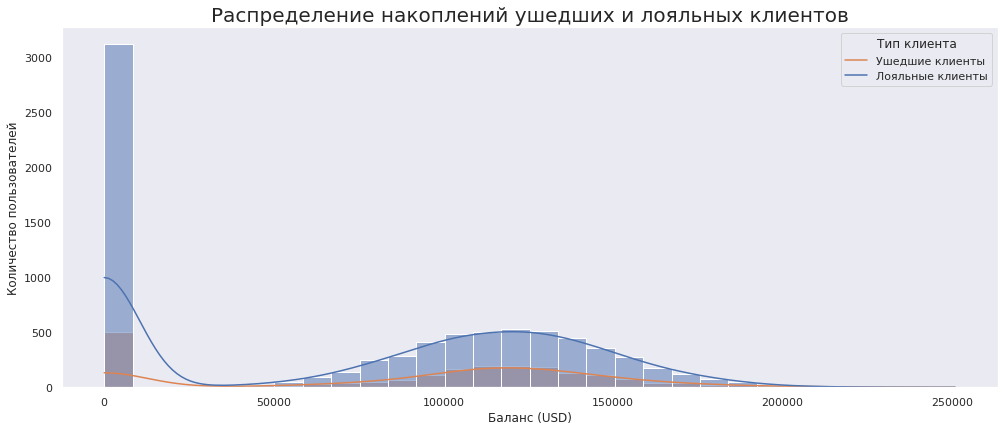

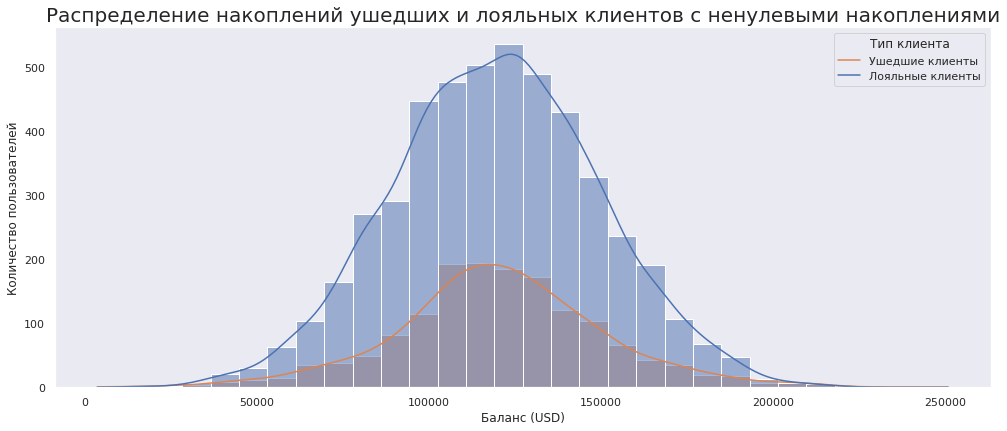

In [18]:
fig = plt.figure(figsize=(13, 5))
axes = fig.add_axes([0, 0, 1, 1])
sns.histplot(
    churn_data,
    x='Balance',
    bins = 30,
    kde = True,
    ax = axes,
    label = ['Лояльные клиенты', 'Ушедшие клиенты'],
    hue = 'Exited'
    )
axes.grid()
axes.legend(title='Тип клиента', loc='upper right', labels=['Ушедшие клиенты', 'Лояльные клиенты'])
axes.set_title('Распределение накоплений ушедших и лояльных клиентов', fontsize=20)
axes.set_xlabel('Баланс (USD)')
axes.set_ylabel('Количество пользователей')

fig = plt.figure(figsize=(13, 5))
axes = fig.add_axes([0, 0, 1, 1])
sns.histplot(
    churn_data[churn_data['Balance'] > 0],
    x='Balance',
    bins = 30,
    kde = True,
    ax = axes,
    label = ['Лояльные клиенты', 'Ушедшие клиенты'],
    hue = 'Exited'
    )
axes.grid()
axes.legend(title='Тип клиента', loc='upper right', labels=['Ушедшие клиенты', 'Лояльные клиенты'])
axes.set_title('Распределение накоплений ушедших и лояльных клиентов с ненулевыми накоплениями', fontsize=20)
axes.set_xlabel('Баланс (USD)')
axes.set_ylabel('Количество пользователей')





Исходя из полученных распределения накоплений лояльных и ушедших клиентов видно, что распределение в обоих случаях нормальное. Это говорит о том, что накопления ушедших и лояльных клинетов примерно одинаковые. Видно так же что ушедших клиентов гораздо меньше чем лояльных. Замечено так же, что самая большая группа клиентов для обоих категорий вообще не имеет накоплений. На втором графике представлено более наглядное распределение балансов, для этого были взяты только те пользователи, на счету которых есть накопления. Сделать выводы о том, что может не устраивать ушедших из банка клиентов по данным распределеняим по моему мнению нельзя. Необходимы дальнейшие исследования.

# Задание 9.4
## Сравнение возрастов ушедших и лояльных клиентов


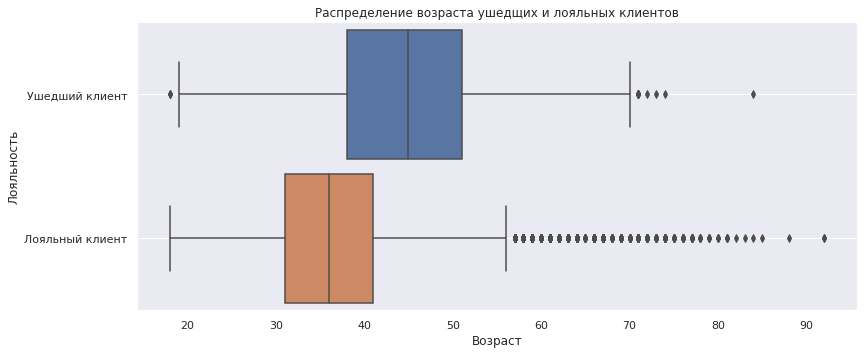

In [19]:
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
boxplot = sns.boxplot(
    data=churn_data,
    y='Loyalty',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста ушедщих и лояльных клиентов');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

Из полученных распределений можно сделать вывод, что в группе лояльных пользователей больше потенциальных выбрасов со стороны возрастных клиентов. Банку стоит обратить внимание на категорию пользователей в возрасте от 40 до 50 лет.

# Задание 9.5
## Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.

In [29]:

fig = px.scatter(
    data_frame=churn_data, 
    x = 'EstimatedSalary', 
    y = 'CreditScore', 
    color = 'Loyalty',
    title = ('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
)
fig.update_layout(
    title_font_size=20,
    xaxis_title='Предполагаеиая зарплата',
    yaxis_title='Кредитный рейтинг',
    width=1000,
    height=700
)



Была построена диаграмма рассеяния зависимости кредитного рейтинга от предполагаемой зарплаты для лояльных и ушедших клиентов. Очевидных зависимостей для категорий клиентов не наблюдается. 

# Задание 9.6
## Соотношение ушедших мужчин и женщин

In [ ]:
bar_data = churn_data.groupby(['Gender'], as_index=False).mean()
fig=px.pie(
    data_frame=bar_data,
    values = 'Exited',
    names = 'Gender',
    title='Соотношение ушедших мужчин и женщин',
    color = 'Gender',
    color_discrete_map={'Male':'blue','Female':'pink'},
    width=500,
    height=500
)
fig.show()


Из построенного "пирога" можно сделать вывод, что чаще уходят из банка женщины

# Задание 9.7
## Влияние колличества преорбретенных услуг на отток клиентов


Text(0, 0.5, 'Количество пользователей')

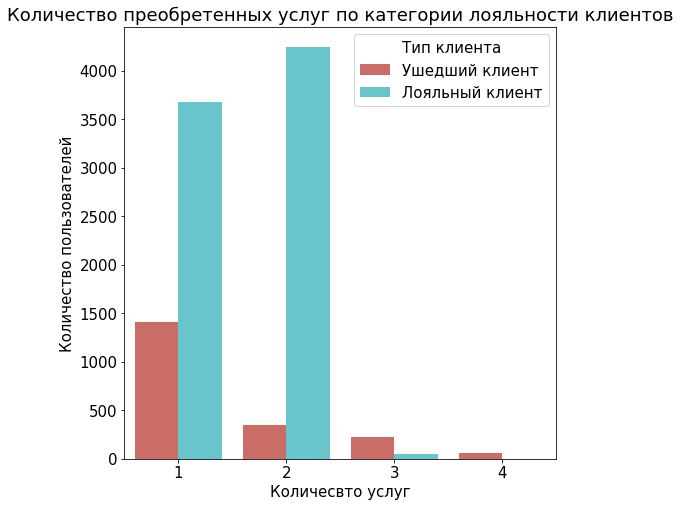

In [ ]:

fig = plt.figure(figsize=(6, 6))
axes = fig.add_axes([0, 0, 1, 1])

barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='CustomerId',
    hue = 'Loyalty',
    estimator = len,
    palette='hls',
    
)
barplot.set_title('Количество преобретенных услуг по категории лояльности клиентов');
barplot.legend(title='Тип клиента', loc='upper right')
axes.set_xlabel('Количесвто услуг')
axes.set_ylabel('Количество пользователей')

Из полученных гистаграмм видно, что, если у клиента есть ровно две услуги, то он с меньшей вероятностью уйдет из банка. Практичеки нет лояльных клиентов с тремя услугами, почти все у кого имеются три услуги уходят, а с четырмя услугами лояльных клинетов нет вообще. Так же видно, что основной отток клиентов происходит в группе пользователей с одной услугой. Вероятно имеет смысл старться навязать этим пользователям вторую услугу.

# Задание 9.8
## Влияние статуса активного клиента на отток


In [ ]:
def active(act):
    if act == 1:
        return 'Активный клиент'
    else:
        return 'Неактивный клиент'
    
churn_data['Activity'] = churn_data['IsActiveMember'].apply(active)
churn_data2 = churn_data.groupby(['Activity','Loyalty']).count()
fig = px.sunburst(
    churn_data, 
    path=['Activity','Loyalty'],
    #values = churn_data['IsActiveMember'}+],
    width=550,
    height=550,
    title='Влияние статуса активного клиента на отток',
    
    )
fig.update_traces(textinfo="label+percent entry")


fig.show()

Из полученной диаграммы видно, что количество активных и неактивных клиентов примерно равно, но активных чуть больше. Среди неактивных колиентов доля ушедших больше примерно в два раза. Предполагаю, что чтобы уменьшить отток клиентов среди неактивных надо стараться перевести их в категорию активных клиентов.

# Задание 9.9
## Распределение ушедших клиентов по странам

In [ ]:
churn_data_99 = churn_data.groupby(['Geography'] , as_index=False).mean()

fig = px.choropleth(
    data_frame=churn_data_99,
    locations="Geography",
    locationmode = "country names",
    color="Exited", 
    title='Распределение ушедших клиентов по странам', 
    width=1000, 
    height=500, 
    color_continuous_scale="Viridis", 
    labels={'Exited':'Ушедшие клиенты'}
)
fig.update_layout(
    title_font_size=20,
)
fig.show()

Из полученного распределения видно, что самая большая доля ушедших клиентов из Германии, примерно половина всех ушедших. Сделать вывод с чем это связано из представленного распределения невозможно, разве что можно предположить, что это свзано с георграфическим расположением страны, находящейся севернее всех.

# Задание 9.10 
## Доля ушедших клиентов в зависимотси от кредитного рейтинга и времени пользования услугами банка

Text(110.59375, 0.5, 'Кредитный рейтинг')

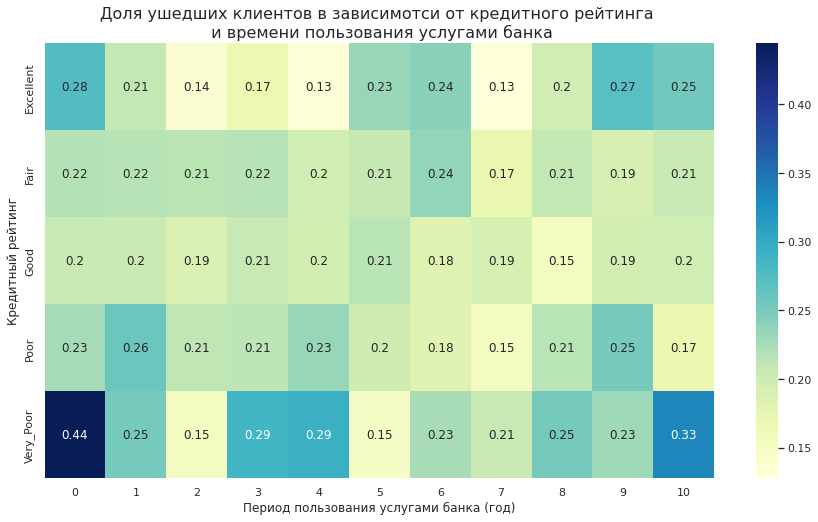

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScore_New'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScore_New',
    aggfunc = 'mean', 
)
sns.set(rc = {'figure.figsize':(15,8)})
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu', annot=True, fmt='.2g')
heatmap.set_title('Доля ушедших клиентов в зависимотси от кредитного рейтинга \n и времени пользования услугами банка', fontsize=16);
heatmap.set_xlabel('Период пользования услугами банка (год)')
heatmap.set_ylabel('Кредитный рейтинг')


Была построена тепловая карта, показывающая долюушедших клинетов в зависимости от кредитного рейтинга и времени пользования услугами. Из тепловой карты видно, что больше всего клиентов уходит с самым низким кредитным рейтингом пользующиеся услугами меньше года. Задем идут пользователи с низшим кредитным рейтингом, которые пользуются услугами 10 лет. В целом видно, что уходят больше пользователи с наименьшим рейтингом, что не удивительно, а так же пользователи с высоким рейтингом. Это может быть связано, что с тем, что дюди с наивысшим рейтингом имеют высокую финансовую грамотность и постоянно следят за банковскими продуктами, которые в какой то момент могут перестать им быть выгодны и это не зависит от времени пользования услугами банка.